In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np
from numpy import ndarray
import shutil

SKINS_DIR = '../skins/'
FACES_DIR = '../faces/'

In [2]:
def read_face_file(file_name: str) -> ndarray:
    return mpimg.imread(os.path.join(FACES_DIR, file_name))

def read_skin_file(file_name: str) -> ndarray:
    return mpimg.imread(os.path.join(SKINS_DIR, file_name))

## rename all files to zero-padded 5 digits

In [3]:
import os

skin_files = os.listdir(FACES_DIR)
skin_files = sorted(skin_files)

for i, skin_file_name in enumerate(skin_files):
    new_file_name = "{:05d}".format(i + 1)
    
    file_path = os.path.join(FACES_DIR, skin_file_name)
    
    _, extension = os.path.splitext(skin_file_name)
    
    new_file_path = os.path.join(FACES_DIR, new_file_name + extension)
    
    os.rename(file_path, new_file_path)


In [4]:
import os

skin_files = os.listdir(SKINS_DIR)
skin_files = sorted(skin_files)

for i, skin_file_name in enumerate(skin_files):
    new_file_name = "{:05d}".format(i + 1)
    
    file_path = os.path.join(SKINS_DIR, skin_file_name)
    
    _, extension = os.path.splitext(skin_file_name)
    
    new_file_path = os.path.join(SKINS_DIR, new_file_name + extension)
    
    os.rename(file_path, new_file_path)


## show mask and face

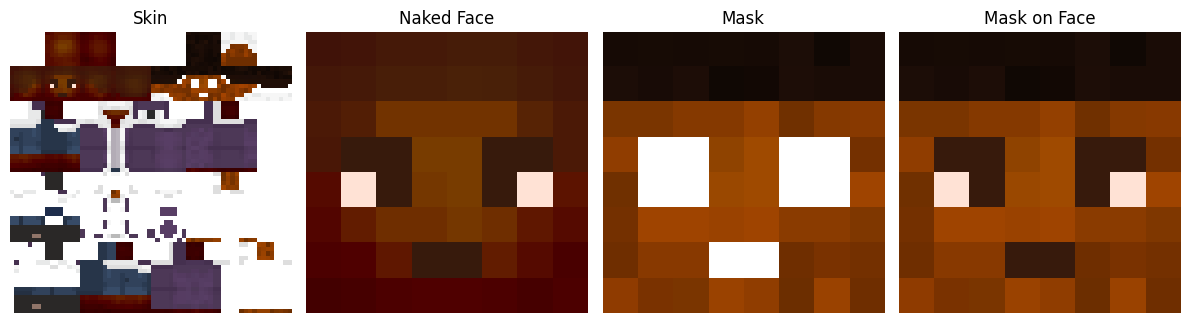

In [5]:
fig, axs = plt.subplots(1, 4, figsize=(12, 4))

# source image: https://www.minecraftskins.com/skin/21856799/trial-boy/
skin = mpimg.imread("./assets/trial-boy-21856799.png")

# skin image
axs[0].imshow(skin)
axs[0].set_title('Original skin file')
axs[0].axis('off')

# naked face
face = skin[8:16, 8:16]
axs[1].imshow(face)
axs[1].set_title('Naked face')
axs[1].axis('off')

# mask
mask = skin[8:16, 40:48]
axs[2].imshow(mask)
axs[2].set_title('Mask')
axs[2].axis('off')

# mask on face
new_face = face.copy()
opacity = mask[:, :, 3]
non_zero_opacity_indices = np.where(opacity != 0)
new_face[non_zero_opacity_indices] = mask[non_zero_opacity_indices]
axs[3].imshow(new_face)
axs[3].set_title('Mask on face')
axs[3].axis('off')

plt.tight_layout()
plt.show()

## put mask on face and replace with skin

In [5]:
if not os.path.isdir(FACES_DIR):
    os.mkdir(FACES_DIR)

skin_files = os.listdir(SKINS_DIR)

for skin_file in skin_files:
    skin = read_skin_file(skin_file)
    face = skin[8:16, 8:16]
    mask = skin[8:16, 40:48]

    # put mask on face
    non_zero_opacity_indexes = np.where(mask[:, :, 3] != 0)
    face[non_zero_opacity_indexes] = mask[non_zero_opacity_indexes]

    # save as RGB
    face = Image.fromarray((face[:, :, :3] * 255).astype(np.uint8))
    face.save(os.path.join(FACES_DIR, skin_file))

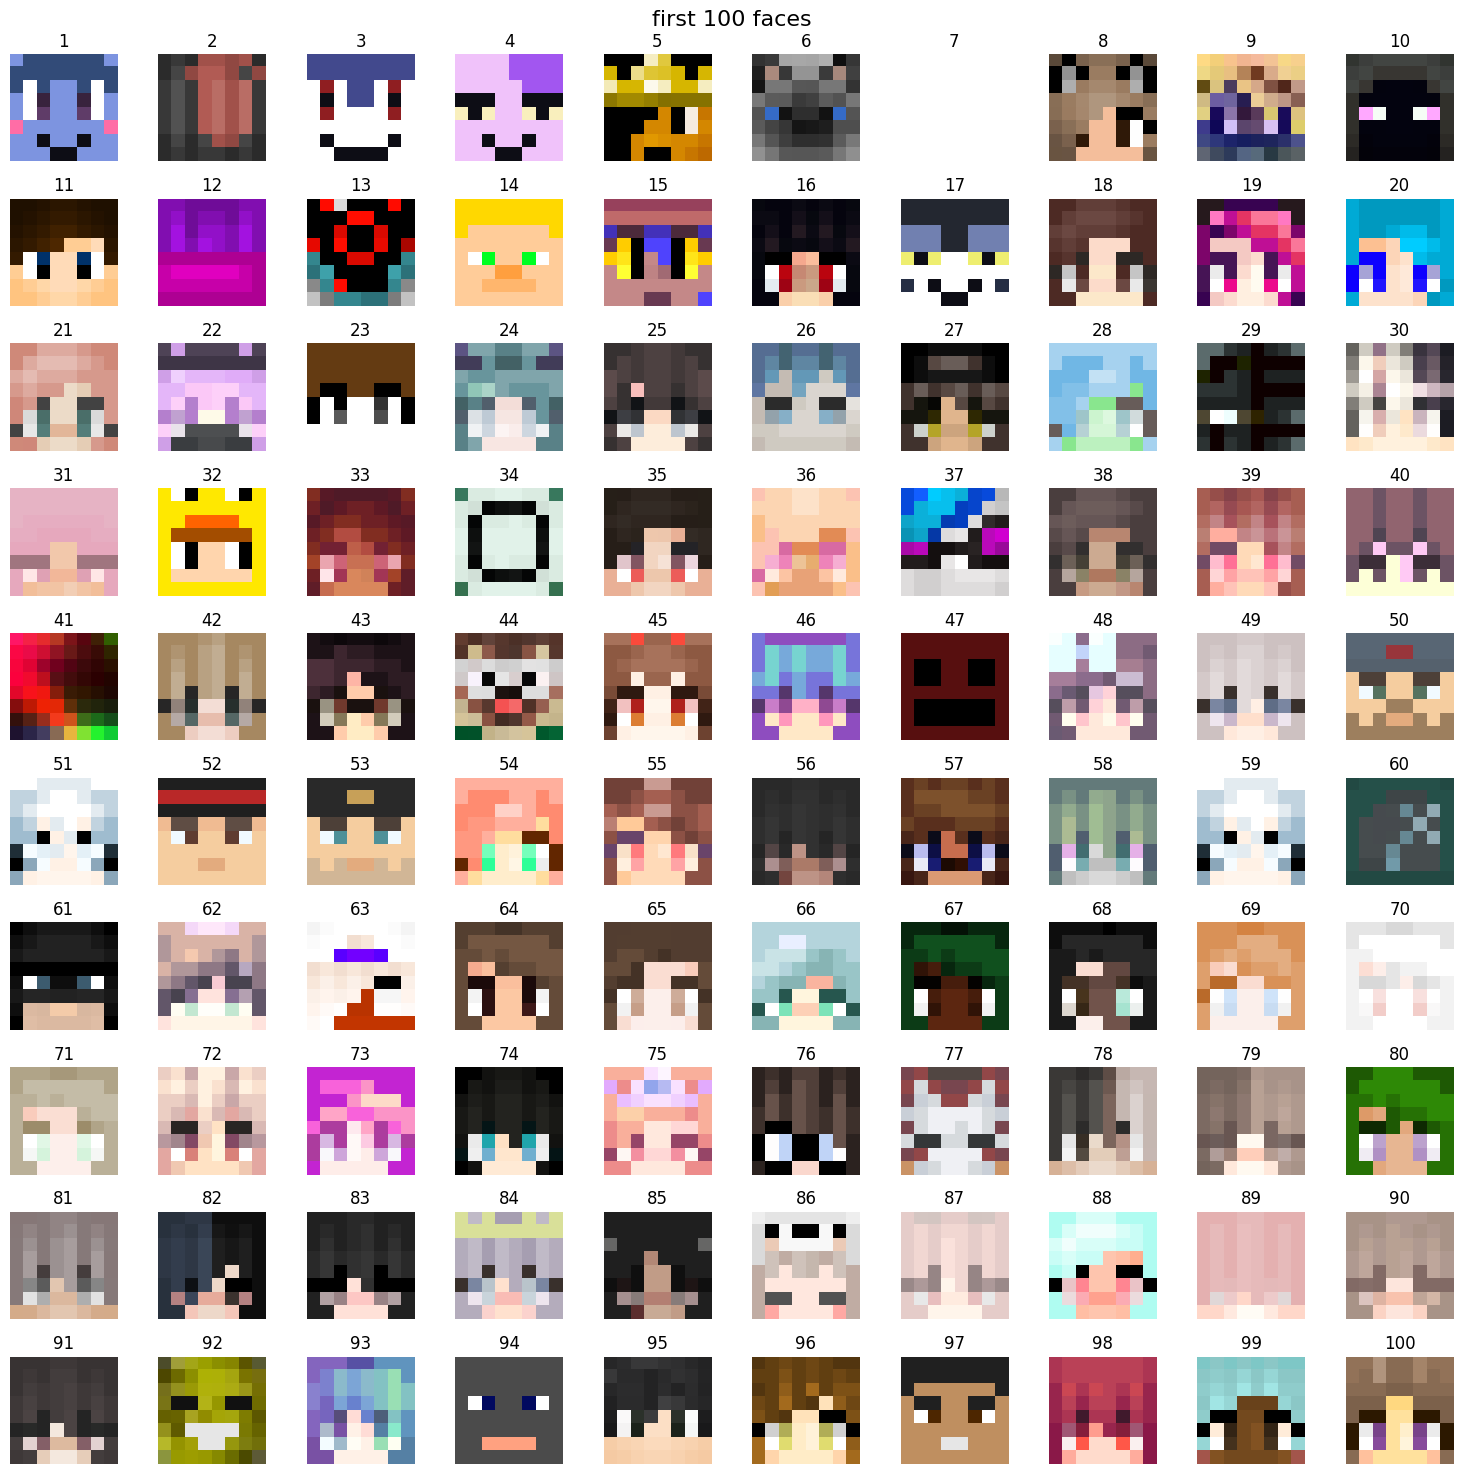

In [7]:
num_faces = 100
face_files = os.listdir(FACES_DIR)
face_files = sorted(face_files)

fig, axs = plt.subplots(num_faces // 10, 10, figsize=(15, 15))
fig.suptitle(f'first {num_faces} faces', fontsize=16)

for i, face_file in enumerate(face_files[:num_faces]):
    img = read_face_file(face_file)
    axs[i // 10, i % 10].imshow(img)
    axs[i // 10, i % 10].axis('off')
    axs[i // 10, i % 10].set_title(str(i + 1))

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()